In [1]:
# from IPython.display import display, HTML
# display(HTML("<style>.container { width:100% !important; }</style>"))

# %matplotlib notebook

import sys
sys.path.append('..')

from simulation import MonteCarloSimulation, ResultPlotter

In [2]:
INTEREST_RATE = 0.02
CAPITAL_GAINS_TAX_RATE = 0.278186
ETF_TAX_EXEMPTION = 0.3
YEARLY_INFLATION_RATE = 0.02

NUM_SIMULATIONS = 300_000
MAX_BATCH_SIZE = 100_000

/home/ryse/Documents/Projects/Simulation/simulation/plots.py:77: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


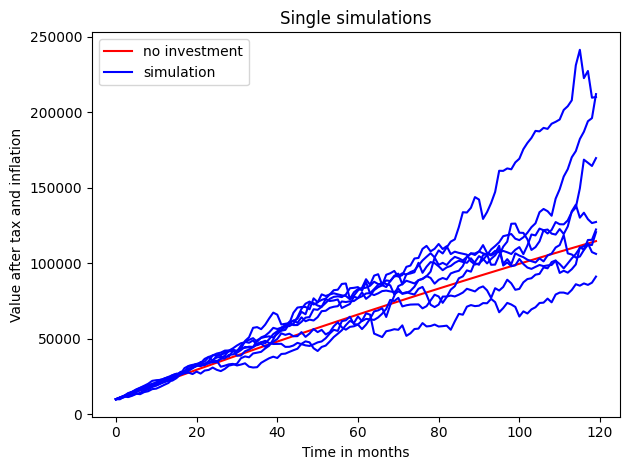

In [3]:
sim = MonteCarloSimulation(
    num_sim=8,
    interest_rate=INTEREST_RATE,
    capital_gains_tax_rate=CAPITAL_GAINS_TAX_RATE,
    investment_tax_exemption=ETF_TAX_EXEMPTION,
    yearly_inflation_rate=YEARLY_INFLATION_RATE,
    max_batch_size=MAX_BATCH_SIZE
)
sim_result = sim.simulate(
    num_years=10,
    current_invest=10_000,
    current_save=0,
    monthly_invest=1_000,
    monthly_save=0,
    calculate_sequence=True
)
plotter = ResultPlotter(sim_result)
plotter.print_chart()

Investment horizon:            20 years
Currently invested:            10,000
Currently risk free deposited: 10,000
Monthly invested:              750
Monthly risk free deposited:   750
Annualized return:             6.3%
Annualized volatility:         15.3%


,Resulting Wealth
Percentiles,
0.01,"245,274.30"
0.05,"277,139.35"
0.10,"294,630.19"
0.20,"320,276.29"
0.30,"342,716.04"
0.40,"365,078.67"
0.50,"388,790.02"
0.75,"469,167.92"
0.90,"570,223.07"


Average resulting wealth: 415,919
Only safe deposit:        299,073
Fraction of Worse Outcomes compared to not investing: 11.5%
Conditional mean loss: -23710.5


/home/ryse/Documents/Projects/Simulation/simulation/plots.py:63: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


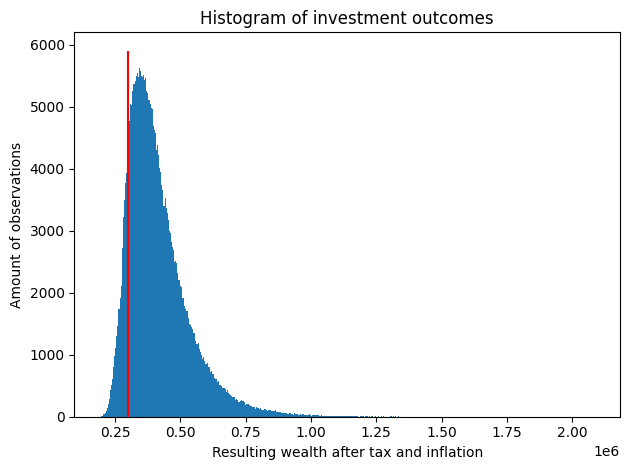

In [8]:
sim = MonteCarloSimulation(
    num_sim=NUM_SIMULATIONS,
    interest_rate=INTEREST_RATE,
    capital_gains_tax_rate=CAPITAL_GAINS_TAX_RATE,
    investment_tax_exemption=ETF_TAX_EXEMPTION,
    yearly_inflation_rate=YEARLY_INFLATION_RATE,
    max_batch_size=MAX_BATCH_SIZE
)
sim_result = sim.simulate(
    num_years=20,
    current_invest=10_000,
    current_save=10_000,
    monthly_invest=750,
    monthly_save=750,
)
plotter = ResultPlotter(sim_result)
plotter.print_result()